# <center>K Nearest Neighbors</center>

## Import libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style('whitegrid')
%matplotlib inline

## Import data

In [10]:
classified_data = pd.read_csv("datasets/Classified Data",index_col=0)

In [11]:
classified_data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Create X array

In [15]:
classified_data.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [30]:
X = classified_data[['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']]

In [31]:
X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


## Create Y array

In [43]:
y = classified_data['TARGET CLASS']

In [44]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

## Scale the data

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
scaled_feature = scaler.transform(X)

In [38]:
scaled_feature

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [40]:
X_feature = pd.DataFrame(scaled_feature,columns = X.columns)

In [41]:
X_feature.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Split the data into train and test

In [42]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

## Check the length of train and test dataset

In [46]:
print("Training Set of X:", len(X_train))
print("Testing Set of X:", len(X_test))
print("Training Set of y:", len(y_train))
print("Testing Set of y:", len(y_test))

Training Set of X: 700
Testing Set of X: 300
Training Set of y: 700
Testing Set of y: 300


## K Nearest Neighbors Algorithm

In [47]:
from sklearn.neighbors import KNeighborsClassifier

## Create an object

In [48]:
knn = KNeighborsClassifier()

## Fit the model

In [49]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## Predictions

In [50]:
predictions = knn.predict(X_test)

## Evaluate the model

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print(confusion_matrix(y_test,predictions))

[[153   6]
 [ 11 130]]


In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       159
           1       0.96      0.92      0.94       141

   micro avg       0.94      0.94      0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



## Explore various value of K

In [56]:
error_rate = []

In [61]:
for i in range(1,31):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions_i = knn.predict(X_test)
    error_rate.append(np.mean(predictions_i != y_test))

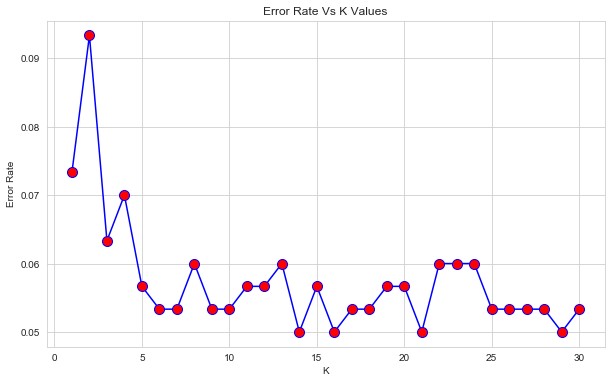

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(1,31),error_rate,color="blue",linestyle = '-',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate Vs K Values')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig("error_rate.png")